##### Imports 

In [1]:
import os
import re
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

pd.set_option("display.max_rows", None)

##### Constants 

In [2]:
NAME_OF_DATASET = "myocardial"
DESCRIPTION_FILENAME = "Myocardial infarction complications Database description.pdf"
DATASET_FILENAME = "Myocardial infarction complications Database.csv"
NAME_OF_FILE = "Myocardial infarction complications Database.csv"
SAVE_PATH = "scaled_myocardial_infarction_dataset.csv"

##### Dataset loading 

The original Dataset can be found here: [dataset](https://leicester.figshare.com/articles/dataset/Myocardial_infarction_complications_Database/12045261/3). 

Credits: Golovenkin S.E. [и др.]. Myocardial infarction complications Database // 2020.

In [3]:
# Load dataset into current working directory, if no dataset was found
if f"{NAME_OF_DATASET}.zip" not in os.listdir():
    !wget https://leicester.figshare.com/ndownloader/articles/12045261/versions/3 -O myocardial.zip

In [4]:
# Unzip dataset, if it was loaded
if NAME_OF_DATASET not in os.listdir():
    with zipfile.ZipFile(f"{NAME_OF_DATASET}.zip", "r") as zip_file:
        zip_file.extractall(NAME_OF_DATASET)

It's important to note that authors of dataset provided examples of classification tasks for the dataset, detailed explanation is shown below:

There are four possible time moments for __complication prediction__: on base of the 
information known at
1. __the time of admission to hospital__: all input columns (2-112) except 93, 94, 95, 100, 101, 
102, 103, 104, 105 can be used for prediction;
2. __the end of the first day__ (24 hours after admission to the hospital): all input columns (2-112) except 94, 95, 101, 102, 104, 105 can be used for prediction;
3. __the end of the second day__ (48 hours after admission to the hospital) all input columns (2-112) except 95, 102, 105 can be used for prediction;
4. __the end of the third day__ (72 hours after admission to the hospital) all input columns (2-112) can be used for prediction.

__Feature columns__ with description of possible values. The column name abbreviations used in the database structure are given in parentheses.
1. Record ID (ID).
2. Age (AGE).
3. Gender (SEX):
0 – female
1 – male
4. Quantity of myocardial infarctions in the anamnesis (INF_ANAM):
0 – zero
1 – one
2 – two
3 – three and more
5. Exertional angina pectoris in the anamnesis (STENOK_AN):
0 – never
1 – during the last year
2 – one year ago
3 – two years ago
4 – three years ago
5 – 4-5 years ago
6 – more than 5 years ago
6. Functional class (FC) of angina pectoris in the last year (FK_STENOK)[2]:
0 – there is no angina pectoris
1 – I FC
2 – II FC
3 – III FC.
4 – IV FC 
7. Coronary heart disease (CHD) in recent weeks, days before admission to hospital
(IBS_POST):
0 – there was no СHD
1 – exertional angina pectoris
2 – unstable angina pectoris
8. Heredity on CHD (IBS_NASL):
0 – isn’t burdened
1 – burdened
9. Presence of an essential hypertension (GB):
0 – there is no essential hypertension
1 – Stage 1
2 – Stage 2
3 – Stage 3
10. Symptomatic hypertension (SIM_GIPERT):
0 – no
1 – yes 
11. Duration of arterial hypertension (DLIT_AG):
0 – there was no arterial hypertension
1 – one year
2 – two years
3 – three years
4 – four years
5 – five years
6 – 6-10 years
7 – more than 10 years
12. Presence of chronic Heart failure (HF) in the anamnesis (ZSN_A):
0 – there is no chronic heart failure
1 – I stage
2 – IIА stage (heart failure due to right ventricular systolic dysfunction)
3 – IIА stage (heart failure due to left ventricular systolic dysfunction)
4 – IIB stage (heart failure due to left and right ventricular systolic dysfunction)
13. Observing of arrhythmia in the anamnesis (nr11):
0 – no
1 – yes
14. Premature atrial contractions in the anamnesis (nr01):
0 – no
1 – yes
15. Premature ventricular contractions in the anamnesis (nr02):
0 – no
1 – yes
16. Paroxysms of atrial fibrillation in the anamnesis (nr03):
0 – no
1 – yes
17. A persistent form of atrial fibrillation in the anamnesis (nr04):
0 – no
1 – yes
18. Ventricular fibrillation in the anamnesis (nr07):
0 – no
1 – yes
19. Ventricular paroxysmal tachycardia in the anamnesis (nr08):
0 – no
1 – yes
20. First-degree AV block in the anamnesis (np01):
0 – no
1 – yes
21. Third-degree AV block in the anamnesis (np04):
0 – no
1 – yes
22. LBBB (anterior branch) in the anamnesis (np05):
0 – no
1 – yes
23. Incomplete LBBB in the anamnesis (np07):
0 – no
1 – yes
24. Complete LBBB in the anamnesis (np08):
0 – no
1 – yes
25. Incomplete RBBB in the anamnesis (np09):
0 – no
1 – yes
26. Complete RBBB in the anamnesis (np10):
0 – no
1 – yes
27. Diabetes mellitus in the anamnesis (endocr_01):
0 – no
1 – yes
28. Obesity in the anamnesis (endocr_02):
0 – no
1 – yes
29. Thyrotoxicosis in the anamnesis (endocr_03):
0 – no
1 – yes

30. Chronic bronchitis in the anamnesis (zab_leg_01):
0 – no
1 – yes
31.Obstructive chronic bronchitis in the anamnesis (zab_leg_02):
0 – no
1 – yes
32. Bronchial asthma in the anamnesis (zab_leg_03):
0 – no
1 – yes
33. Chronic pneumonia in the anamnesis (zab_leg_04):
0 – no
1 – yes
34. Pulmonary tuberculosis in the anamnesis (zab_leg_06):
0 – no
1 – yes
35. Systolic blood pressure according to Emergency Cardiology Team (S_AD_KBRIG) 
(mmHg).
36. Diastolic blood pressure according to Emergency Cardiology Team (D_AD_KBRIG) 
(mmHg).
37. Systolic blood pressure according to intensive care unit (S_AD_ORIT) (mmHg).
38. Diastolic blood pressure according to intensive care unit (D_AD_ORIT) (mmHg).
39. Pulmonary edema at the time of admission to intensive care unit (O_L_POST):
0 – no
1 – yes
40. Cardiogenic shock at the time of admission to intensive care unit (K_SH_POST):
0 – no
1 – yes
41. Paroxysms of atrial fibrillation at the time of admission to intensive care unit, (or at a prehospital stage) (MP_TP_POST):
0 – no
1 – yes
42. Paroxysms of supraventricular tachycardia at the time of admission to intensive care unit, (or 
at a pre-hospital stage) (SVT_POST):
0 – no
1 – yes
43. Paroxysms of ventricular tachycardia at the time of admission to intensive care unit, (or at a 
pre-hospital stage) (GT_POST):
0 – no
1 – yes
44. Ventricular fibrillation at the time of admission to intensive care unit, (or at a pre-hospital 
stage) (FIB_G_POST):
0 – no
1 – yes
45. Presence of an anterior myocardial infarction (left ventricular) (ECG changes in leads V1 –
V4 ) (ant_im):
0 – there is no infarct in this location
1 – QRS has no changes
2 – QRS is like QR-complex
3 – QRS is like Qr-complex
4 – QRS is like QS-complex 
46. Presence of a lateral myocardial infarction (left ventricular) (ECG changes in leads V5 – V6 , 
I, AVL) (lat_im):
0 – there is no infarct in this location
1 – QRS has no changes
2 – QRS is like QR-complex
3 – QRS is like Qr-complex
4 – QRS is like QS-complex 
47. Presence of an inferior myocardial infarction (left ventricular) (ECG changes in leads III, 
AVF, II). (inf_im):
0 – there is no infarct in this location
1 – QRS has no changes
2 – QRS is like QR-complex
3 – QRS is like Qr-complex
4 – QRS is like QS-complex 
48. Presence of a posterior myocardial infarction (left ventricular) (ECG changes in V7 – V9, 
reciprocity changes in leads V1 – V3) (post_im):
0 – there is no infarct in this location
1 – QRS has no changes
2 – QRS is like QR-complex
3 – QRS is like Qr-complex
4 – QRS is like QS-complex 
49. Presence of a right ventricular myocardial infarction (IM_PG_P):
0 – no
1 – yes
50. ECG rhythm at the time of admission to hospital – sinus (with a heart rate 60-90) 
(ritm_ecg_p_01):
0 – no
1 – yes
51. ECG rhythm at the time of admission to hospital – atrial fibrillation (ritm_ecg_p_02):
0 – no
1 – yes
52. ECG rhythm at the time of admission to hospital – atrial (ritm_ecg_p_04):
0 – no
1 – yes
53. ECG rhythm at the time of admission to hospital – idioventricular (ritm_ecg_p_06):
0 – no
1 – yes
54. ECG rhythm at the time of admission to hospital – sinus with a heart rate above 90 
(tachycardia) (ritm_ecg_p_07):
0 – no
1 – yes
55. ECG rhythm at the time of admission to hospital – sinus with a heart rate below 60 
(bradycardia) (ritm_ecg_p_08):
0 – no
1 – yes
56. Premature atrial contractions on ECG at the time of admission to hospital (n_r_ecg_p_01):
0 – no
1 – yes
57. Frequent premature atrial contractions on ECG at the time of admission to hospital 
(n_r_ecg_p_02):
0 – no
1 – yes
58.Premature ventricular contractions on ECG at the time of admission to hospital 
(n_r_ecg_p_03):
0 – no
1 – yes
59. Frequent premature ventricular contractions on ECG at the time of admission to hospital 
(n_r_ecg_p_04):
0 – no
1 – yes
60. Paroxysms of atrial fibrillation on ECG at the time of admission to hospital (n_r_ecg_p_05):
0 – no
1 – yes

61. Persistent form of atrial fibrillation on ECG at the time of admission to hospital 
(n_r_ecg_p_06):
0 – no
1 – yes
62. Paroxysms of supraventricular tachycardia on ECG at the time of admission to hospital 
(n_r_ecg_p_08):
0 – no
1 – yes
63. Paroxysms of ventricular tachycardia on ECG at the time of admission to hospital 
(n_r_ecg_p_09):
0 – no
1 – yes
64. Ventricular fibrillation on ECG at the time of admission to hospital (n_r_ecg_p_10):
0 – no
1 – yes
65. Sinoatrial block on ECG at the time of admission to hospital (n_p_ecg_p_01):
0 – no
1 – yes
66. First-degree AV block on ECG at the time of admission to hospital (n_p_ecg_p_03):
0 – no
1 – yes
67. Type 1 Second-degree AV block (Mobitz I/Wenckebach) on ECG at the time of admission to 
hospital (n_p_ecg_p_04):
0 – no
1 – yes 
68. Type 2 Second-degree AV block (Mobitz II/Hay) on ECG at the time of admission to 
hospital (n_p_ecg_p_05):
0 – no
1 – yes
69. Third-degree AV block on ECG at the time of admission to hospital (n_p_ecg_p_06):
0 – no
1 – yes
70. LBBB (anterior branch) on ECG at the time of admission to hospital (n_p_ecg_p_07):
0 – no
1 – yes
71. LBBB (posterior branch) on ECG at the time of admission to hospital (n_p_ecg_p_08):
0 – no
1 – yes
72. Incomplete LBBB on ECG at the time of admission to hospital (n_p_ecg_p_09):
0 – no
1 – yes
73. Complete LBBB on ECG at the time of admission to hospital (n_p_ecg_p_10):
0 – no
1 – yes
74. Incomplete RBBB on ECG at the time of admission to hospital (n_p_ecg_p_11):
0 – no
1 – yes
75. Complete RBBB on ECG at the time of admission to hospital (n_p_ecg_p_12):
0 – no
1 – yes
76. Fibrinolytic therapy by Сеliasum 750k IU (fibr_ter_01):
0 – no
1 – yes
77. Fibrinolytic therapy by Сеliasum 1m IU (fibr_ter_02):
0 – no
1 – yes
78. Fibrinolytic therapy by Сеliasum 3m IU (fibr_ter_03):
0 – no
1 – yes
79. Fibrinolytic therapy by Streptase (fibr_ter_05):
0 – no
1 – yes
80. Fibrinolytic therapy by Сеliasum 500k IU (fibr_ter_06):
0 – no
1 – yes
81. Fibrinolytic therapy by Сеliasum 250k IU (fibr_ter_07):
0 – no
1 – yes
82. Fibrinolytic therapy by Streptodecase 1.5m IU (fibr_ter_08):
0 – no
1 – yes 
83. Hypokalemia ( < 4 mmol/L) (GIPO_K):
0 – no
1 – yes 
84. Serum potassium content (K_BLOOD) (mmol/L).
85. Increase of sodium in serum (more than 150 mmol/L) (GIPER_Na):
0 – no
1 – yes
86. Serum sodium content (Na_BLOOD) (mmol/L).
87. Serum AlAT content (ALT_BLOOD) (IU/L).
88. Serum AsAT content (AST_BLOOD) (IU/L).
89. Serum CPK content (KFK_BLOOD) (IU/L).
90. White blood cell count (billions per liter) (L_BLOOD).

91. ESR (Erythrocyte sedimentation rate) (ROE) (мм). 
92. Time elapsed from the beginning of the attack of CHD to the hospital (TIME_B_S):
1 – less than 2 hours
2 – 2-4 hours
3 – 4-6 hours
4 – 6-8 hours
5 – 8-12 hours 
6 – 12-24 hours
7 – more than 1 days
8 – more than 2 days
9 – more than 3 days
93. Relapse of the pain in the first hours of the hospital period (R_AB_1_n):
0 – there is no relapse
1 – only one
2 – 2 times
3 – 3 or more times
94. Relapse of the pain in the second day of the hospital period (R_AB_2_n):
0 – there is no relapse
1 – only one
2 – 2 times
3 – 3 or more times
95. Relapse of the pain in the third day of the hospital period (R_AB_3_n):
0 – there is no relapse
1 – only one
2 – 2 times
3 – 3 or more times 
96. Use of opioid drugs by the Emergency Cardiology Team (NA_KB):
0 – no
1 – yes 
97. Use of NSAIDs by the Emergency Cardiology Team (NOT_NA_KB):
0 – no
1 – yes 
98.Use of lidocaine by the Emergency Cardiology Team (LID_KB):
0 – no
1 – yes
99. Use of liquid nitrates in the ICU (NITR_S):
0 – no
1 – yes
100. Use of opioid drugs in the ICU in the first hours of the hospital period (NA_R_1_n):
0 – no
1 – once
2 – twice
3 – three times
4 – four times
101. Use of opioid drugs in the ICU in the second day of the hospital period (NA_R_2_n):
0 – no
1 – once
2 – twice
3 – three times
102. Use of opioid drugs in the ICU in the third day of the hospital period (NA_R_3_n):
0 – no
1 – once
2 – twice
103. Use of NSAIDs in the ICU in the first hours of the hospital period (NOT_NA_1_n):
0 – no
1 – once
2 – twice
3 – three times
4 – four or more times 
104. Use of NSAIDs in the ICU in the second day of the hospital period (NOT_NA_2_n):
0 – no
1 – once
2 – twice
3 – three times
105. Use of NSAIDs in the ICU in the third day of the hospital period (NOT_NA_3_n):
0 – no
1 – once
2 – twice
106. Use of lidocaine in the ICU (LID_S_n):
0 – no
1 – yes
107. Use of beta-blockers in the ICU (B_BLOK_S_n):
0 – no
1 – yes
108. Use of calcium channel blockers in the ICU (ANT_CA_S_n):
0 – no
1 – yes
109. Use of а anticoagulants (heparin) in the ICU (GEPAR_S_n):
0 – no
1 – yes
110. Use of acetylsalicylic acid in the ICU (ASP_S_n):
0 – no
1 – yes
111. Use of Ticlid in the ICU (TIKL_S_n):
0 – no
1 – yes
112. Use of Trental in the ICU (TRENT_S_n):
0 – no
1 – yes

Complications and outcomes of myocardial infarction (__Possible target variables__):

113. Atrial fibrillation (FIBR_PREDS):
0 – no
1 – yes
114. Supraventricular tachycardia (PREDS_TAH):
0 – no
1 – yes
115. Ventricular tachycardia (JELUD_TAH):
0 – no
1 – yes 
116. Ventricular fibrillation (FIBR_JELUD):
0 – no
1 – yes
117. Third-degree AV block (A_V_BLOK):
0 – no
1 – yes 
118. Pulmonary edema (OTEK_LANC):
0 – no
1 – yes 
119. Myocardial rupture (RAZRIV):
0 – no
1 – yes 
120. Dressler syndrome (DRESSLER):
0 – no
1 – yes
121. Chronic heart failure (ZSN):
0 – no
1 – yes
122. Relapse of the myocardial infarction (REC_IM):
0 – no
1 – yes
123. Post-infarction angina (P_IM_STEN):
0 – no
1 – yes
124. Lethal outcome (cause) (LET_IS):
    0. – unknown
    1. – cardiogenic shock
    2. – pulmonary edema
    3. – myocardial rupture
    4. – progress of congestive heart failure
    5. – thromboembolism
    6. – asystole
    7. – ventricular fibrillation

We have quite a few of features to work with, let's see how many rows there are.

In [5]:
infarction_df = pd.read_csv(os.path.join(NAME_OF_DATASET, NAME_OF_FILE))

In [6]:
infarction_df.head(5)

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,3,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,4,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,5,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(f"Rows: {infarction_df.shape[0]}, Columns: {infarction_df.shape[1]}")

Rows: 1700, Columns: 124


We don't have as many samples, though.

##### Quick EDA 

In [8]:
infarction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 124 entries, ID to LET_IS
dtypes: float64(110), int64(14)
memory usage: 1.6 MB


We have such a large number of features that pandas gave up on showing the info about columns.

Let's drop `ID` column as it's not needed here.

In [9]:
infarction_df.drop(columns="ID", inplace=True)

In [10]:
numeric_columns = [
    "AGE",
    "S_AD_KBRIG",
    "D_AD_KBRIG",
    "S_AD_ORIT",
    "D_AD_ORIT",
    "K_BLOOD",
    "NA_BLOOD",
    "ALT_BLOOD",
    "AST_BLOOD",
    "L_BLOOD",
    "ROE",
]

target_columns = [
    "FIBR_PREDS",
    "PREDS_TAH",
    "JELUD_TAH",
    "FIBR_JELUD",
    "A_V_BLOK",
    "OTEK_LANC",
    "RAZRIV",
    "DRESSLER",
    "ZSN",
    "REC_IM",
    "P_IM_STEN",
    "LET_IS",
]

categorical_columns = []
for col in infarction_df.columns:
    if col not in numeric_columns and col not in target_columns:
        categorical_columns.append(col)

In [11]:
total_stats = infarction_df.describe().T
total_stats

,count,mean,std,min,25%,50%,75%,max
AGE,1692.0,61.856974,11.259936,26.00,54.00,63.00,70.00,92.00
SEX,1700.0,0.626471,0.483883,0.00,0.00,1.00,1.00,1.00
INF_ANAM,1696.0,0.554835,0.836801,0.00,0.00,0.00,1.00,3.00
STENOK_AN,1594.0,2.316186,2.440586,0.00,0.00,1.00,5.00,6.00
FK_STENOK,1627.0,1.205286,1.040814,0.00,0.00,2.00,2.00,4.00
IBS_POST,1649.0,1.160703,0.801400,0.00,0.00,1.00,2.00,2.00
IBS_NASL,72.0,0.375000,0.487520,0.00,0.00,0.00,1.00,1.00
GB,1691.0,1.393258,1.088803,0.00,0.00,2.00,2.00,3.00
SIM_GIPERT,1692.0,0.033688,0.180478,0.00,0.00,0.00,0.00,1.00
DLIT_AG,1452.0,3.340220,3.098646,0.00,0.00,3.00,7.00,7.00


Some of the features have different scales (`AGE`, `S_AD_*`, `NA_BLOOD` in particular). That is something that we need to keep in mind for future calculations.

In [12]:
infarction_df[categorical_columns].astype("str").describe().T

,count,unique,top,freq
SEX,1700,2,1,1065
INF_ANAM,1700,5,0.0,1060
STENOK_AN,1700,8,0.0,661
FK_STENOK,1700,6,2.0,854
IBS_POST,1700,4,2.0,683
IBS_NASL,1700,3,nan,1628
GB,1700,5,2.0,880
SIM_GIPERT,1700,3,0.0,1635
DLIT_AG,1700,9,0.0,551
ZSN_A,1700,6,0.0,1468


The percentage of values for categorical columns are biased toward a common value for that feature (meaning we have only a small fraction of the dataset with values that aren't a norm for most people).

In [13]:
infarction_df[target_columns].astype("str").describe().T

,count,unique,top,freq
FIBR_PREDS,1700,2,0,1530
PREDS_TAH,1700,2,0,1680
JELUD_TAH,1700,2,0,1658
FIBR_JELUD,1700,2,0,1629
A_V_BLOK,1700,2,0,1643
OTEK_LANC,1700,2,0,1541
RAZRIV,1700,2,0,1646
DRESSLER,1700,2,0,1625
ZSN,1700,2,0,1306
REC_IM,1700,2,0,1541


Targets continue the trend of categorical features.

From the table above we can also see the possible features with NaN values. Let's switch our focus on them for now.

In [14]:
features_with_nan = total_stats[total_stats["count"] != len(infarction_df)]
print(f"Columns with NaN: {len(features_with_nan)}")
features_with_nan

Columns with NaN: 110


,count,mean,std,min,25%,50%,75%,max
AGE,1692.0,61.856974,11.259936,26.00,54.00,63.00,70.00,92.00
INF_ANAM,1696.0,0.554835,0.836801,0.00,0.00,0.00,1.00,3.00
STENOK_AN,1594.0,2.316186,2.440586,0.00,0.00,1.00,5.00,6.00
FK_STENOK,1627.0,1.205286,1.040814,0.00,0.00,2.00,2.00,4.00
IBS_POST,1649.0,1.160703,0.801400,0.00,0.00,1.00,2.00,2.00
IBS_NASL,72.0,0.375000,0.487520,0.00,0.00,0.00,1.00,1.00
GB,1691.0,1.393258,1.088803,0.00,0.00,2.00,2.00,3.00
SIM_GIPERT,1692.0,0.033688,0.180478,0.00,0.00,0.00,0.00,1.00
DLIT_AG,1452.0,3.340220,3.098646,0.00,0.00,3.00,7.00,7.00
ZSN_A,1646.0,0.194411,0.658722,0.00,0.00,0.00,0.00,4.00


Most of the features have NaN values in them, but that could be fixed by applying some kind of preprocessing via filling the missing values with median and so on.

Missing values in Medicine datasets is a kind of standard due to the fact that there are a lot of features to be measured. So there is a potential for human error or not filling the details about the patient because of time constraints.

We also have two features `IBS_NASL` and `KFK_BLOOD` where the overwhelming majority of rows are NaN. So, these columns will be removed.

There are no NaN values in targets, so that's a one good thing for sure.

`S_AD_KBRIG` and `D_AD_KBRIG` are two features, where more than half of values are NaN. Features themselves were collected from _Emergency Cardiology Team_, maybe they weren't called for cases with NaN values. These two features would need special care in _Filling NaNs_ section.

In [15]:
infarction_df.drop(columns=["IBS_NASL", "KFK_BLOOD"], inplace=True)
if "IBS_NASL" in categorical_columns:
    categorical_columns.remove("IBS_NASL")
if "KFK_BLOOD" in categorical_columns:
    categorical_columns.remove("KFK_BLOOD")

Let's see the distributions of the features.

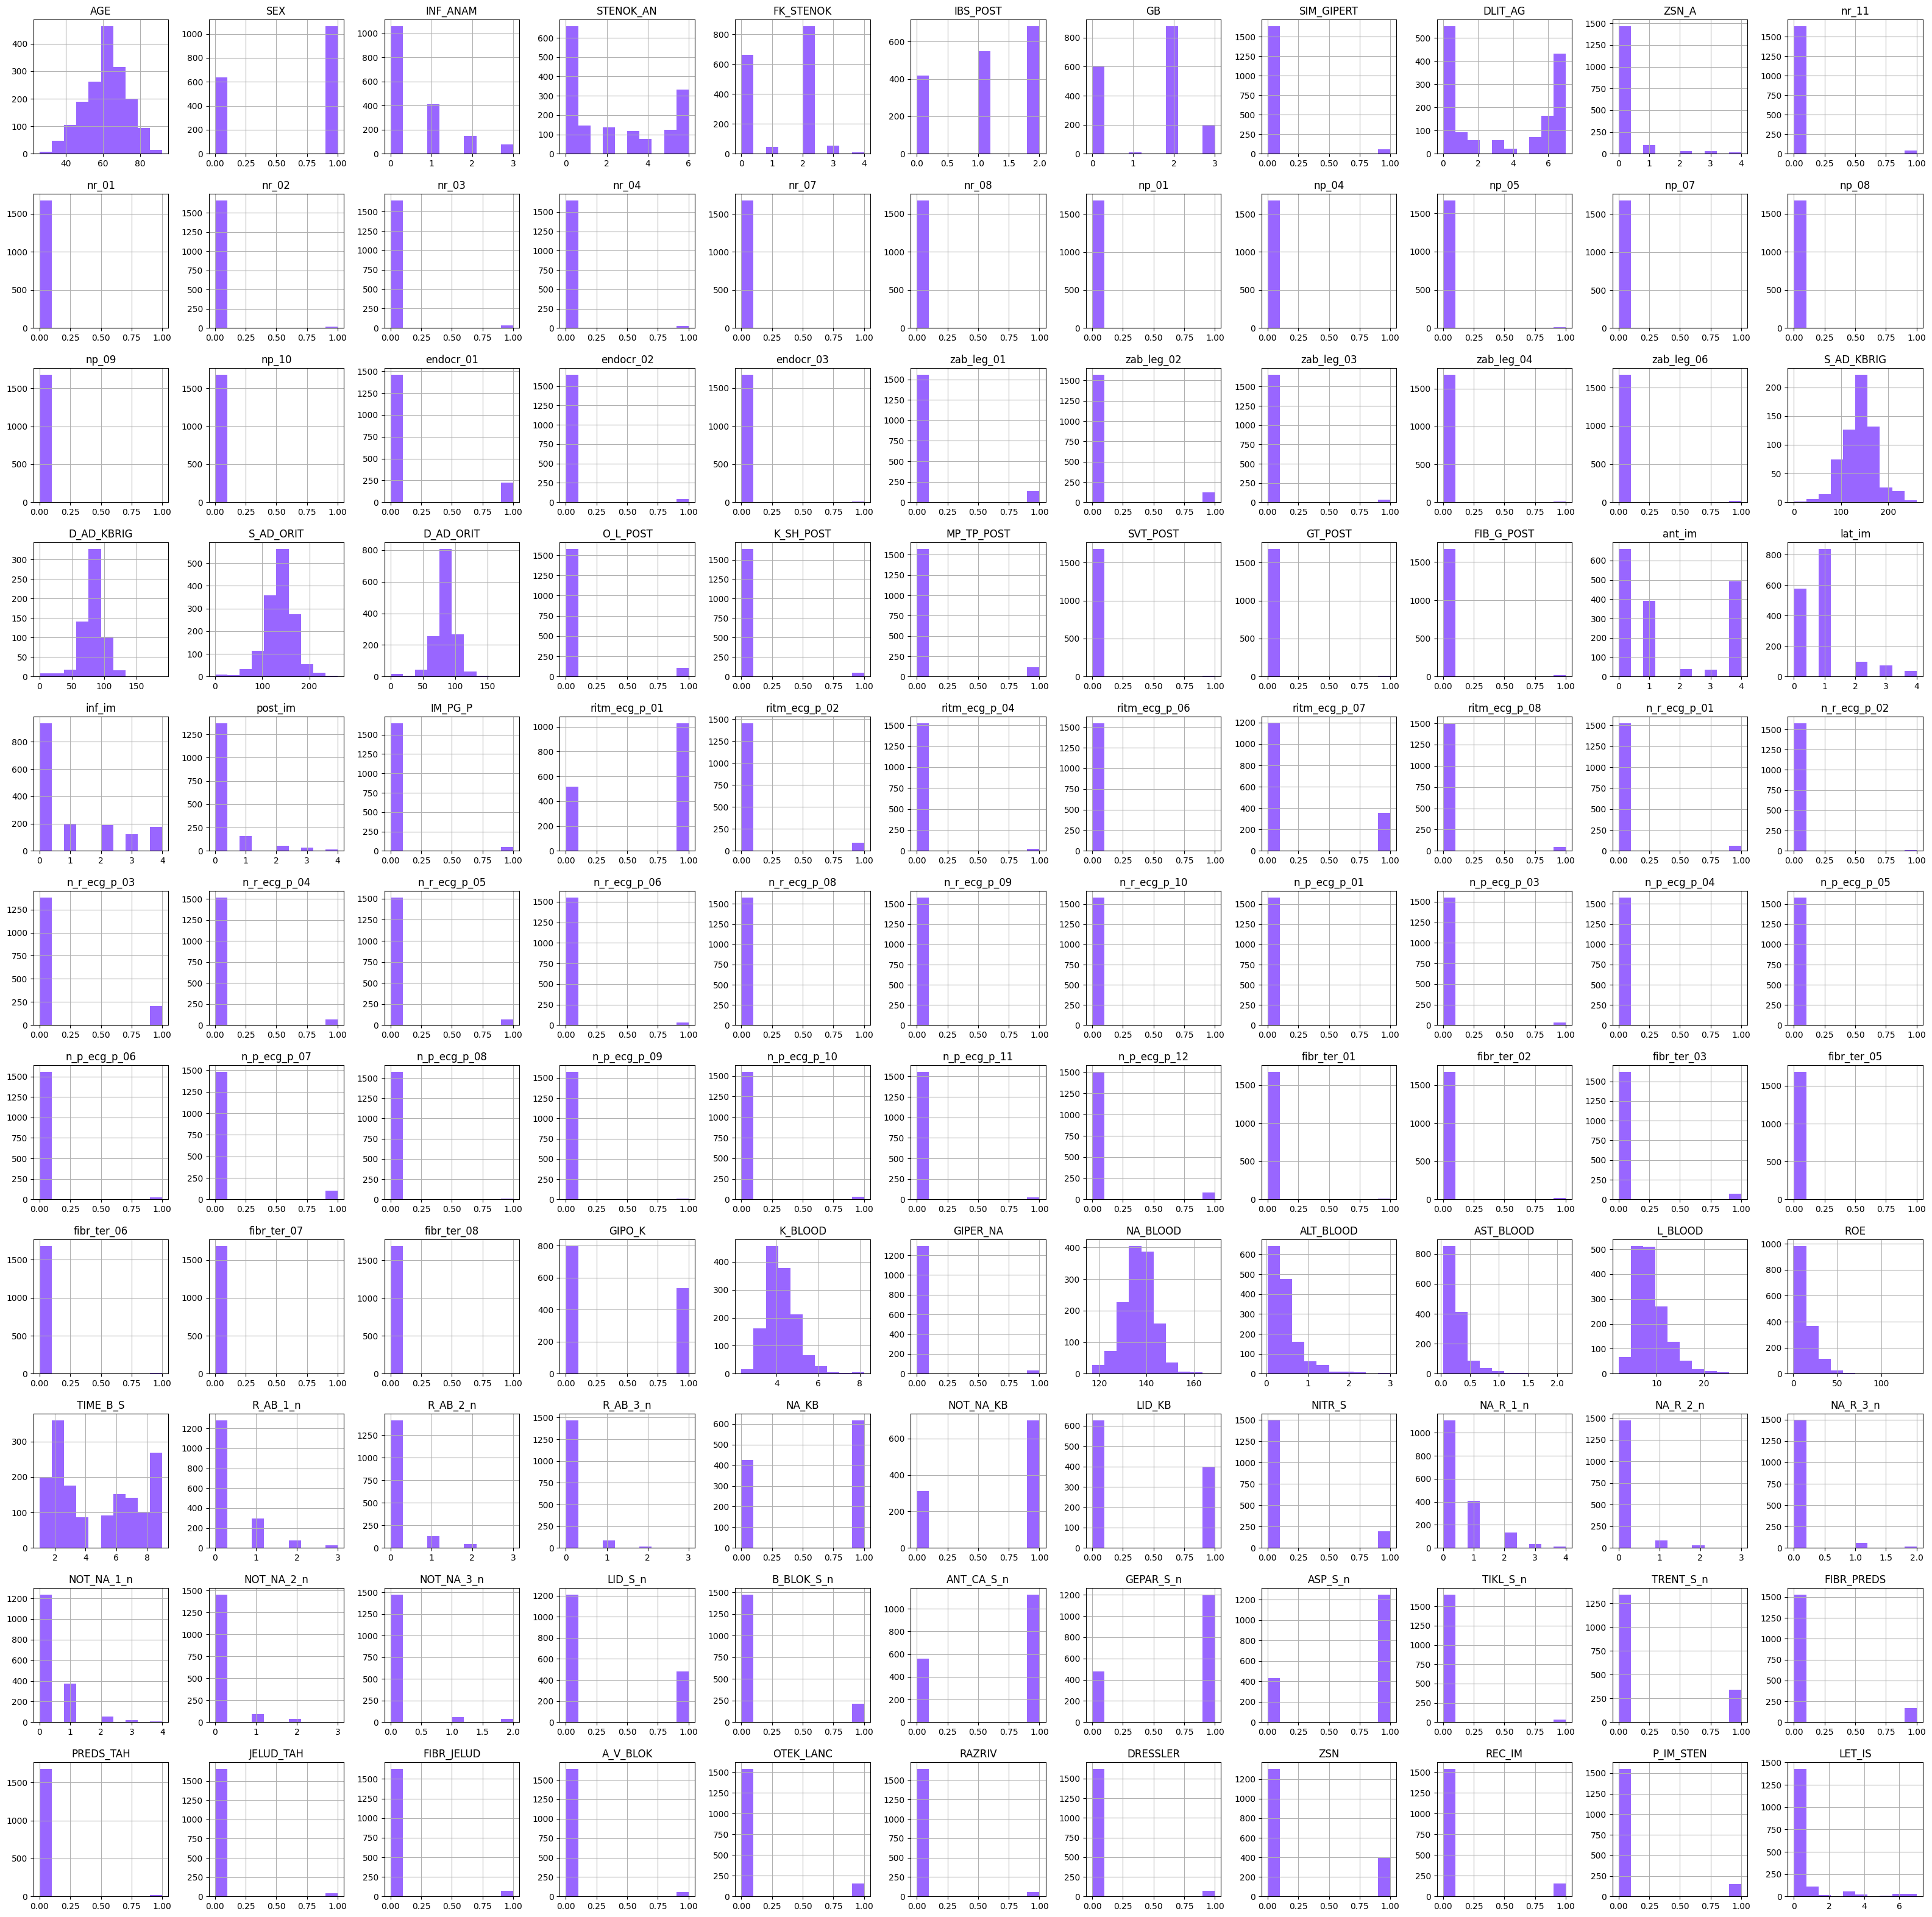

In [16]:
infarction_df.hist(figsize=(40, 40), color="#9966FF");

_You can view the histograms more clearly by opening the image in a new tab._

Based on the histograms provided it's clear that some of the features seem to be normally distributed (`K_BLOOD`, `NA_BLOOD`, `AGE`, `*_KBRIG` and `*_ORIT`. Though most of them represent categorical values with one dominant value in each feature. Of course there are exceptions to this as evidenced from features `NA_KB`, `GEPAR_S_N` where the distribution of categories is not so imbalanced. But, all in all, we have to keep in mind such imbalance, as well as the fact that most of the features present is categorical in nature.

Moreover, standardization of the data is clearly needed.

Let's see the correlations between the target variables and the rest in order to find those that correlate with targets the most.

Plotting correlation matrix is not done due to the fact that we have a lot of features in general, so it would be hard to interpret the results.

In [17]:
corr_matrix = infarction_df.corr()
for target_col in target_columns:
    corr_matrix_for_target = (
        corr_matrix[target_col].sort_values(ascending=False).to_frame().iloc[1:, :]
    )
    corr_matrix_for_target = corr_matrix_for_target[
        np.abs(corr_matrix_for_target) > 0.1
    ].dropna()
    display(corr_matrix_for_target)

,FIBR_PREDS
n_r_ecg_p_05,0.218698
nr_03,0.172141
AGE,0.153658
MP_TP_POST,0.138225
ritm_ecg_p_02,0.113730
nr_11,0.110590
SEX,-0.103361


,PREDS_TAH
n_r_ecg_p_08,0.238918
SVT_POST,0.237932


,JELUD_TAH
FIBR_JELUD,0.137257
IM_PG_P,0.129281
LID_S_n,0.110453
n_r_ecg_p_09,0.107594
fibr_ter_03,0.104709
zab_leg_02,0.103164


,FIBR_JELUD
LID_S_n,0.215168
LET_IS,0.172688
n_r_ecg_p_10,0.170522
JELUD_TAH,0.137257
NA_R_1_n,0.130633
NA_R_2_n,0.114771
K_BLOOD,-0.103597


,A_V_BLOK
inf_im,0.214529
n_p_ecg_p_06,0.192478
ritm_ecg_p_04,0.154914


,OTEK_LANC
NITR_S,0.321394
NA_R_1_n,0.189272
REC_IM,0.174350
NA_R_2_n,0.158278
NA_R_3_n,0.148061
ZSN,0.125196
FK_STENOK,0.120892
O_L_POST,0.112070
ritm_ecg_p_07,0.110933
STENOK_AN,0.106782


,RAZRIV
LET_IS,0.330800
AGE,0.124476
ant_im,0.117858
lat_im,0.104748
DLIT_AG,0.104050


,DRESSLER
fibr_ter_03,0.132769


,ZSN
ZSN_A,0.169750
AGE,0.146107
endocr_01,0.126239
OTEK_LANC,0.125196
NA_R_3_n,0.117053
zab_leg_01,0.113460
n_r_ecg_p_06,0.102929
NA_R_2_n,0.101685
ritm_ecg_p_02,0.100857


,REC_IM
R_AB_3_n,0.180423
OTEK_LANC,0.174350
NA_R_3_n,0.137458
STENOK_AN,0.135158
NA_R_2_n,0.107723
np_01,0.107158


,P_IM_STEN
S_AD_KBRIG,0.128995
FK_STENOK,0.104533


,LET_IS
RAZRIV,0.330800
ZSN_A,0.185769
FIBR_JELUD,0.172688
NITR_S,0.167066
AGE,0.157821
n_p_ecg_p_12,0.139371
R_AB_3_n,0.137189
nr_04,0.135199
ant_im,0.127959
MP_TP_POST,0.126520


There are no highly correlated features with targets, though there are some, that have a certain connection to each other (for example, `RAZRIV` and `LET_IS`).

It's time to preprocess our data. The main strategy used here will consist of following:
- Filling NaN values for categorical columns with Mode
- Filling NaN values for numeric columns by utilizing KNNImputer from Sklearn
- Standardizing the data for Linear Models

##### Data Preprocessing

In [18]:
for categorical_col in categorical_columns:
    infarction_df[categorical_col].fillna(
        infarction_df[categorical_col].mode()[0], inplace=True
    )
infarction_df.describe().T[infarction_df.describe().T["count"] != len(infarction_df)]

,count,mean,std,min,25%,50%,75%,max
AGE,1692.0,61.856974,11.259936,26.00,54.00,63.00,70.00,92.00
S_AD_KBRIG,624.0,136.907051,34.997835,0.00,120.00,140.00,160.00,260.00
D_AD_KBRIG,624.0,81.394231,19.745045,0.00,70.00,80.00,90.00,190.00
S_AD_ORIT,1433.0,134.588276,31.348388,0.00,120.00,130.00,150.00,260.00
D_AD_ORIT,1433.0,82.749477,18.321063,0.00,80.00,80.00,90.00,190.00
K_BLOOD,1329.0,4.191422,0.754076,2.30,3.70,4.10,4.60,8.20
NA_BLOOD,1325.0,136.550943,6.512120,117.00,133.00,136.00,140.00,169.00
ALT_BLOOD,1416.0,0.481455,0.387261,0.03,0.23,0.38,0.61,3.00
AST_BLOOD,1415.0,0.263717,0.201802,0.04,0.15,0.22,0.33,2.15
L_BLOOD,1575.0,8.782914,3.400557,2.00,6.40,8.00,10.45,27.90


In [19]:
numeric_imputer = KNNImputer()
numeric_cols_w_filled_na = numeric_imputer.fit_transform(infarction_df[numeric_columns])
numeric_cols_w_filled_na = pd.DataFrame(
    numeric_cols_w_filled_na, columns=numeric_imputer.get_feature_names_out()
)
for numeric_col in numeric_columns:
    infarction_df[numeric_col].fillna(
        numeric_cols_w_filled_na[numeric_col], inplace=True
    )

In [20]:
infarction_df.describe().T[infarction_df.describe().T["count"] != len(infarction_df)]

,count,mean,std,min,25%,50%,75%,max


No NaN values left.

Standardization of data will be more tricky via utilizing the _Robust Scaler_ from Sklearn. The main advantage to using it is that it's not so dependant on absense of outliers in data, as compared to _Standard Scaler_ and others. Moreover, we will not standardize our target features for easier interpretability.

In [21]:
scaler = RobustScaler()
scaled_df = scaler.fit_transform(infarction_df.drop(columns=target_columns))
scaled_df = pd.DataFrame(scaled_df, columns=scaler.feature_names_in_)
scaled_df.head(5)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
0,0.8750,0.0,2.0,0.0,-0.5,1.0,0.5,0.0,0.857143,0.0,...,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0
1,-0.5000,0.0,1.0,-0.2,-1.0,-1.0,-1.0,0.0,-0.142857,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.6875,0.0,0.0,-0.2,-1.0,1.0,0.0,0.0,0.142857,0.0,...,3.0,2.0,2.0,1.0,1.0,-1.0,0.0,0.0,0.0,0.0
3,0.3125,-1.0,0.0,-0.2,-1.0,1.0,0.0,0.0,0.285714,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.1875,0.0,0.0,-0.2,-1.0,1.0,0.5,0.0,0.857143,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,1.0


In [22]:
scaled_df = pd.DataFrame(
    pd.concat(
        [scaled_df, infarction_df[target_columns]], axis=1, ignore_index=True
    ).to_numpy(),
    columns=infarction_df.columns,
)

In [23]:
scaled_df.head(5)

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,0.8750,0.0,2.0,0.0,-0.5,1.0,0.5,0.0,0.857143,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.5000,0.0,1.0,-0.2,-1.0,-1.0,-1.0,0.0,-0.142857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.6875,0.0,0.0,-0.2,-1.0,1.0,0.0,0.0,0.142857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.3125,-1.0,0.0,-0.2,-1.0,1.0,0.0,0.0,0.285714,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.1875,0.0,0.0,-0.2,-1.0,1.0,0.5,0.0,0.857143,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Additional EDA (outliers)

Let's have a look on possible outliers in data.

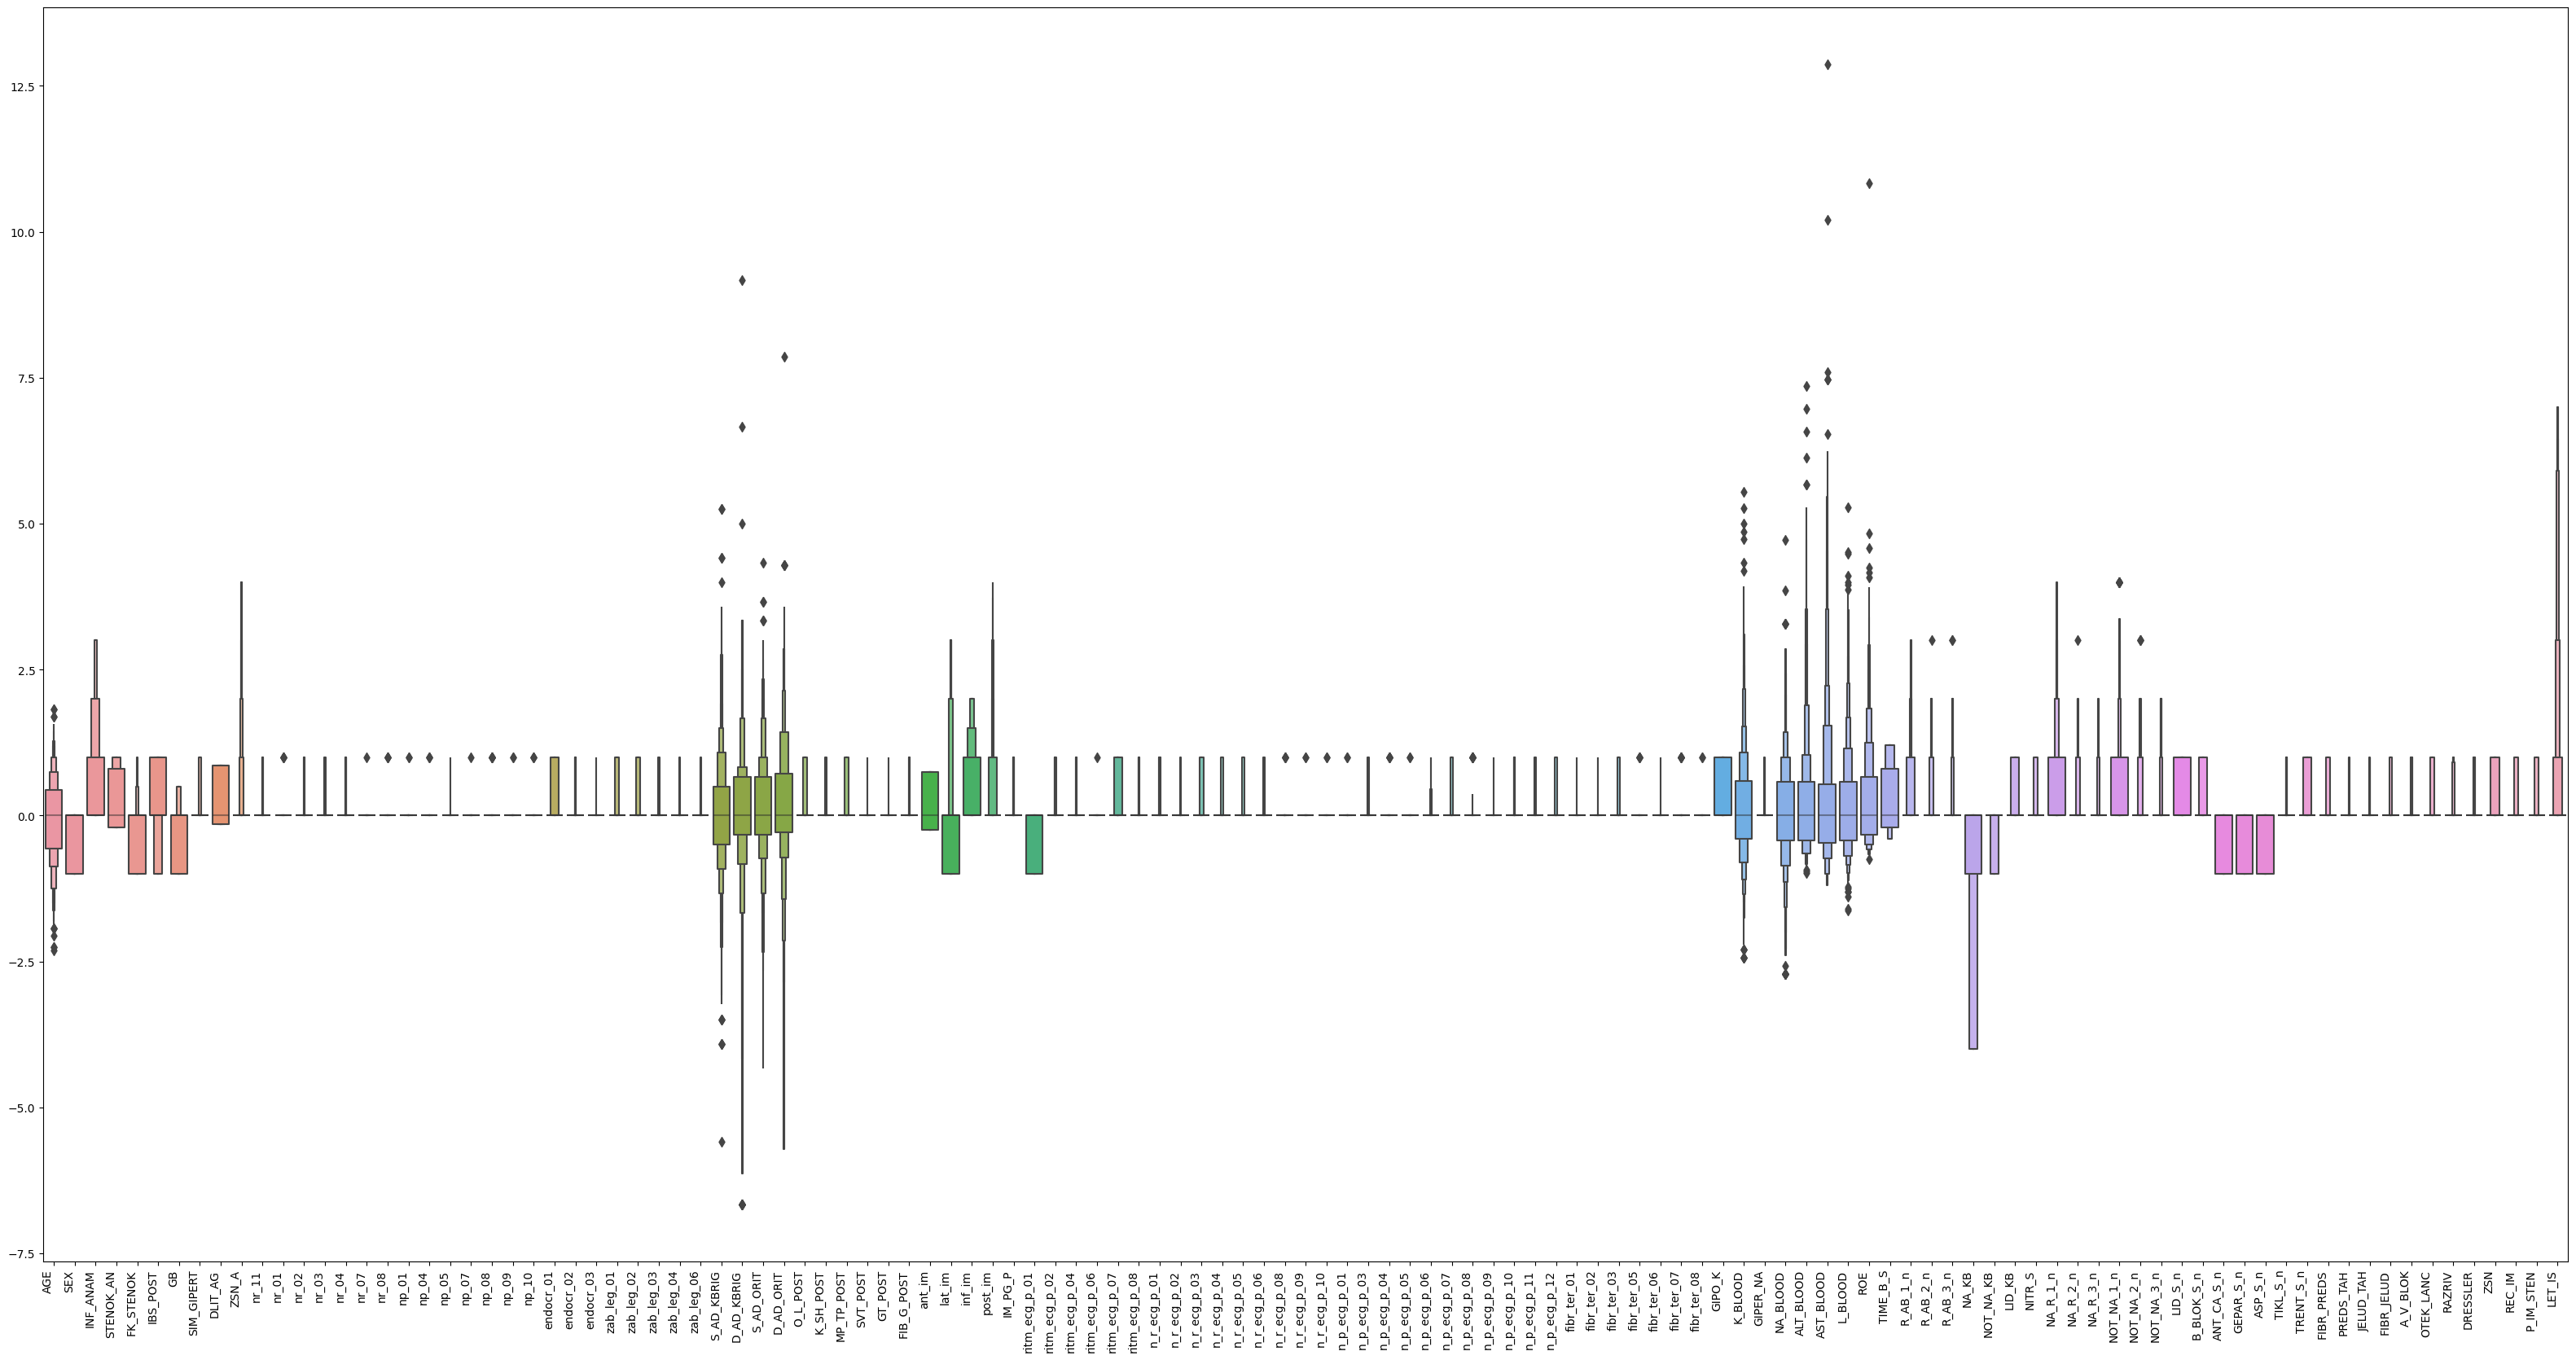

In [24]:
fig, ax = plt.subplots(figsize=(40, 20))
sns.boxenplot(scaled_df, orient="v", ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

Well, most of the numeric columns contain outliers. Though, in this case it's better to live them inplace rather than trying to bring them inline with others because of the following: it's a medical dataset, so any potential outliers represent edge-cases with higher interest.

There are some categorical features with outliers, but it's more about the features themselves (for example, `nr_01` has outlier with value of 1, yet it's value is expected to be so because of the fact that not so many people have _heart arrhythmia_ and percentage of people with this symptom is negligable compared to the rest of samples).

##### Closing Thoughts

Let's save the result of our processing for future tasks.

In [25]:
scaled_df.to_csv(SAVE_PATH, sep=",", index=False)

__The dataset represents the typical medical one in these regards__:
- we have quite a lot of features for samples to begin with
- there aren't many samples (only 1700)
- there are missing values in dataset (two columns were dropped due to this)
- a lot of categorical features have outliers in them; meaning that the distribution of feature is highly displaced towards one common value for such feature
- most of the target features include the problem of categorical features distributions (we have only a few positive cases for target features)

__In order to make our lives easier we have processed the dataset__:
- Filled NaN values for categorical columns with Mode of that column
- Filled NaN values with KNNImputer for numeric columns
- Scaled Dataset for easier use with Linear Models in the future